<a href="https://colab.research.google.com/github/ettouilebouael/pdm-thesis/blob/main/domain_adaptation/FD001_domain_adaptation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install livelossplot --quiet

from google.colab import drive
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from skimage.restoration import denoise_wavelet
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn
import torch.nn.functional as F
import random

drive.mount('/content/drive')
os.chdir("/content/drive/MyDrive/Memoire/PdM_code")

from models import *
from torch_modules import *
from utils import *

random.seed(0)
torch.manual_seed(0) 
np.random.seed(0)


Mounted at /content/drive


In [2]:
features =['s_2', 's_3', 's_4', 's_7', 's_8', 's_9','s_11', 's_12', 's_13', 's_14', 's_15', 's_17', 's_20', 's_21']

seq_len = 30
data_num = 1
batch_size = 128
learning_rate = 1e-4
epochs = 15
dropout = 0
input_size = len(features)
n_lstm_layers = 3
n_hidden_lstm = 32

In [3]:
X_train, y_train = train_preprocessing(data_num,features, seq_len)
X_test, y_test = online_preprocessing(data_num,features, seq_len)

dataset = {
    'train': TurboFanDataset(X_train, y_train),
    'test': TurboFanDataset(X_test, y_test)}

dataloader = {
    'train': DataLoader(dataset['train'], shuffle=True, batch_size=batch_size),
     'test': DataLoader(dataset['test'], shuffle=False, batch_size=batch_size)}

In [4]:
encoder = Encoder(input_size, n_hidden_lstm, n_lstm_layers, dropout)
rul_predictor = RULPredictor(n_hidden_lstm, dropout)

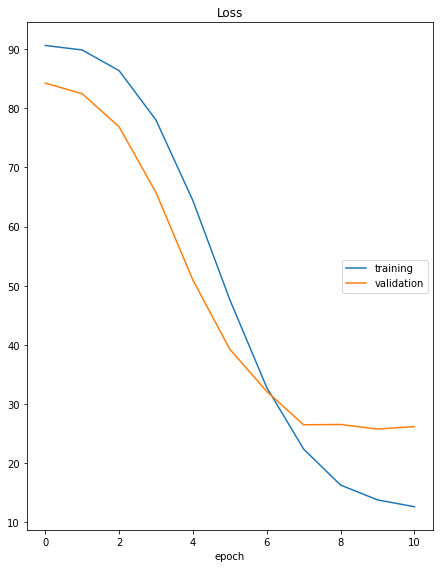

Loss
	training         	 (min:   12.626, max:   90.621, cur:   12.626)
	validation       	 (min:   25.764, max:   84.257, cur:   26.165)


KeyboardInterrupt: ignored

In [5]:
fit(encoder, rul_predictor, dataloader, epochs,learning_rate, data_num)